# Sentiment Analysis of Twitter Data

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

## Reading Dataset

In [5]:
df_tweet = pd.read_csv(r'C:\Users\Brij\Downloads\archive\training1600000.csv')


In [6]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Ploting Dataset as per Sentiment Value

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Questions')

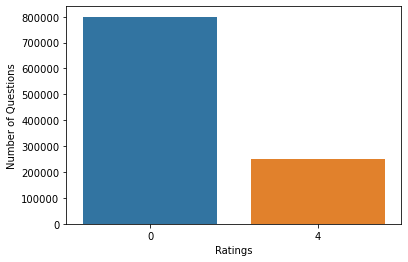

In [7]:
sns.countplot(df_tweet.Target)
plt.xlabel('Ratings')
plt.ylabel('Number of Questions')

In [8]:
df_Neg = df_tweet[df_tweet['Target']==0]
df_Pos = df_tweet[df_tweet['Target']==4]

In [9]:
from PIL import Image

## Ploting Word Cloud of Negative and Positive Tweets

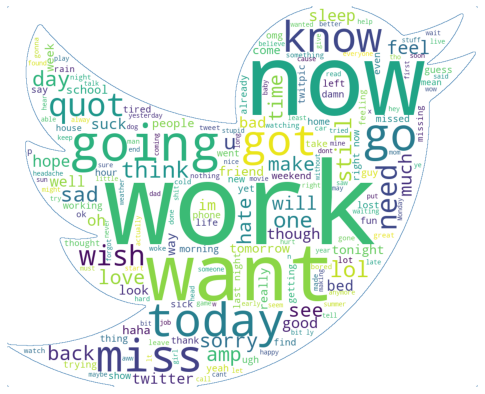

In [10]:
twitter_mask = np.array(Image.open(r"C:\Users\Brij\Desktop\twitter_mask.png"))

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Neg['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Negative-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

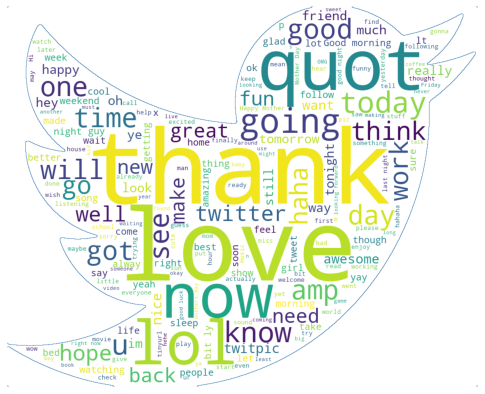

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',contour_width=1, contour_color='steelblue', width=3000, height=2200, mask=twitter_mask).generate(' '.join(df_Pos['Text'].tolist()))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Positive-Words.png', dpi=300)
plt.show()
#plt.savefig('Negative-Words.png')

## Adding Sentiment from Target Value

In [12]:
df_tweet['Sentiment'] = df_tweet.Target.replace({
    0:'negative',
    2:'neutral',
    4:'positive'
})

In [13]:
df_tweet.head()

,Target,Id,Date,Flag,User,Text,Sentiment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,negative
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,negative
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,negative
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",negative
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,negative


In [14]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
from textblob import TextBlob

In [17]:
df_sample = df_tweet.sample(n=50000)
df_X = df_sample['Text']
df_y = df_sample['Sentiment']

## Introduced Subjectivity and Polarity with use of TextBlob

In [18]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_sample['Subjectivity']=df_sample['Text'].apply(getSubjectivity)
df_sample['Polarity']=df_sample['Text'].apply(getPolarity)
df_sample

,Target,Id,Date,Flag,User,Text,Sentiment,Subjectivity,Polarity
542598,0,2200484967,Tue Jun 16 18:57:55 PDT 2009,NO_QUERY,hillaaryy,Seeing all these couples at the mall makes me ...,negative,0.200,0.200000
142379,0,1881475377,Fri May 22 04:46:12 PDT 2009,NO_QUERY,HildeSofie,All work and no play makes Hilde dull girl,negative,0.500,-0.291667
36244,0,1565606616,Mon Apr 20 07:09:03 PDT 2009,NO_QUERY,LippyLady,Hate bn stuck in an office wen its so lovely out,negative,0.825,-0.150000
815101,4,1551022728,Sat Apr 18 07:56:09 PDT 2009,NO_QUERY,ericabrandon,soccer game &amp; shopping,positive,0.400,-0.400000
861619,4,1676691630,Fri May 01 22:51:23 PDT 2009,NO_QUERY,paulmason10538,@timbury Night mate! Sweet dreams...,positive,0.650,0.350000
...,...,...,...,...,...,...,...,...,...
144219,0,1881917823,Fri May 22 05:51:09 PDT 2009,NO_QUERY,harperwhips,@margaritasenora &amp; I love the coffee you m...,negative,0.600,0.781250
502850,0,2187660695,Mon Jun 15 20:36:45 PDT 2009,NO_QUERY,TIERRA226,"When he was in NY, I always said I would visit...",negative,0.000,0.000000
655295,0,2239866653,Fri Jun 19 09:03:33 PDT 2009,NO_QUERY,kaseyfan09,Wanting to spend time with friend but obviousl...,negative,0.500,0.000000
286358,0,1993879823,Mon Jun 01 11:04:22 PDT 2009,NO_QUERY,Schmander,Everyone's having Chipotle for lunch but me,negative,0.000,0.000000


In [19]:
# #Plotting the polarity and subjectivity
# plt.figure(figsize=(8,6))
# for i in range(0,df_sample.shape[0]):
# plt.scatter(df_sample['Polarity'].iloc[i],df_sample['Subjectivity'].iloc[i],color='Green')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [20]:
df_X = df_X.astype(str)

C:\Users\Brij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Overall ratings')

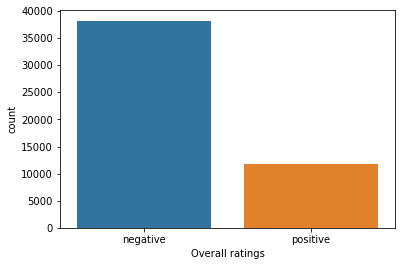

In [21]:
sns.countplot(df_y)
plt.xlabel('Overall ratings')

In [22]:
df_X

542598    Seeing all these couples at the mall makes me ...
142379          All work and no play makes Hilde dull girl 
36244     Hate bn stuck in an office wen its so lovely out 
815101                          soccer game &amp; shopping 
861619                @timbury Night mate! Sweet dreams... 
                                ...                        
144219    @margaritasenora &amp; I love the coffee you m...
502850    When he was in NY, I always said I would visit...
655295    Wanting to spend time with friend but obviousl...
286358         Everyone's having Chipotle for lunch but me 
528847    writing a 15 page paper on American history in...
Name: Text, Length: 50000, dtype: object

In [23]:
df_y

542598    negative
142379    negative
36244     negative
815101    positive
861619    positive
            ...   
144219    negative
502850    negative
655295    negative
286358    negative
528847    negative
Name: Sentiment, Length: 50000, dtype: object

In [24]:
df_rev = pd.DataFrame(data=df_X)
df_rev.columns = ['Text']
df_rev.head()

,Text
542598,Seeing all these couples at the mall makes me ...
142379,All work and no play makes Hilde dull girl
36244,Hate bn stuck in an office wen its so lovely out
815101,soccer game &amp; shopping
861619,@timbury Night mate! Sweet dreams...


## Preprocessing and Cleaning of data 

In [25]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    columntext = doc["Text"] 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', columntext)
    
    tokens = cleantext.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [26]:
df_sample['Body_token'] =  df_sample.apply(clean_doc, axis=1)

In [27]:
def listToString(s): 
    
    columntext = s["Body_token"]
    # initialize an empty string
    str1 = ' '.join([str(elem) for elem in columntext])
    # return string  
    return str1

In [28]:
df_sample['Body_token_string'] =  df_sample.apply(listToString, axis=1)

## Feature Extraction with the help of CountVectorizer and Tfidf

In [29]:
def final(X_data_full):
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full.iloc[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [30]:
df_new = df_sample['Body_token_string']
df_new= df_new.astype(str)

## Training and Testing Split

In [31]:
data_X = final(df_new)
X_train, X_test, y_train, y_test = train_test_split(data_X, df_y, test_size=0.25, random_state= 3000)

## Multinomial Naive Byes 

In [32]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)
predictions = multinomialNB.predict(X_test)

In [33]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

multinomialNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
multinomialNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , multinomialNB_accuracy , " %")
print("f1_score : " , multinomialNB_f1)

              precision    recall  f1-score   support

    negative       0.79      0.99      0.88      9528
    positive       0.89      0.15      0.26      2972

    accuracy                           0.79     12500
   macro avg       0.84      0.57      0.57     12500
weighted avg       0.81      0.79      0.73     12500

[[9474   54]
 [2525  447]]
Accuracy :  79.37  %
f1_score :  0.732


## Decision Trees

In [34]:
# Decision Trees
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dct_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
dct_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , dct_accuracy , " %")
print("f1_score : " , dct_f1)

[[8020 1508]
 [1654 1318]]
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      9528
    positive       0.47      0.44      0.45      2972

    accuracy                           0.75     12500
   macro avg       0.65      0.64      0.64     12500
weighted avg       0.74      0.75      0.74     12500

Accuracy :  74.7  %
f1_score :  0.745


## Logistic Regression

In [36]:
model = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
log_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
log_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , log_accuracy , " %")
print("f1_score : " , log_f1)

[[9146  382]
 [1800 1172]]
              precision    recall  f1-score   support

    negative       0.84      0.96      0.89      9528
    positive       0.75      0.39      0.52      2972

    accuracy                           0.83     12500
   macro avg       0.79      0.68      0.71     12500
weighted avg       0.82      0.83      0.80     12500

Accuracy :  82.54  %
f1_score :  0.804


## Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 3000)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [39]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.81      0.95      0.88      9528
    positive       0.67      0.30      0.42      2972

    accuracy                           0.80     12500
   macro avg       0.74      0.63      0.65     12500
weighted avg       0.78      0.80      0.77     12500

[[9082  446]
 [2071  901]]
Accuracy :  79.86  %
f1_score :  0.769


## Overall Accuracy Report of all Model

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontweight='bold',fontdict=dict(fontsize=15))

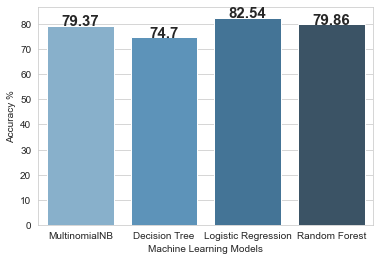

<Figure size 432x288 with 0 Axes>

In [42]:
model = ['MultinomialNB',  'Decision Tree', 'Logistic Regression', 'Random Forest']
acc = [multinomialNB_accuracy, dct_accuracy, log_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Machine Learning Models")
addlabels(model, acc)
sns.barplot(x= model, y= acc, palette='Blues_d')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Final-Result-2.png', dpi=100)